# 1. Interpolation

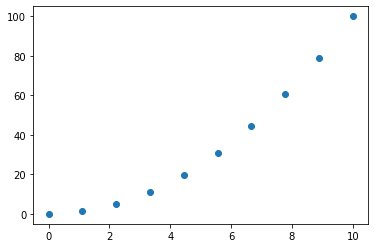

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,10,10)
y= x**2
plt.scatter(x,y)

In [4]:
from scipy.interpolate import interp1d

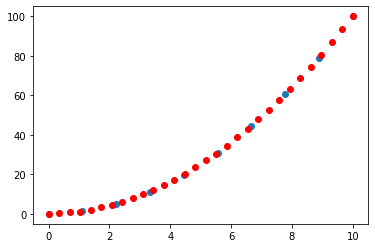

In [5]:
f = interp1d(x,y, kind='linear')

new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,c='r')